0.38


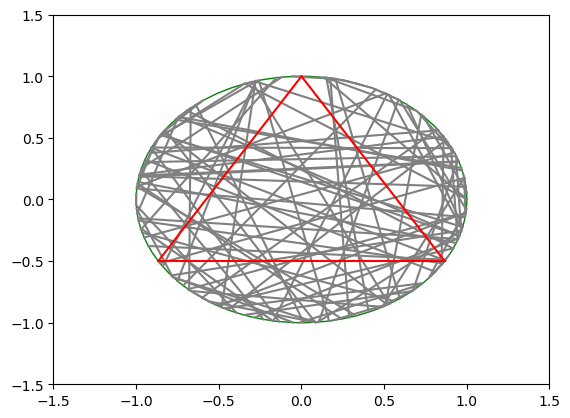

In [3]:
import numpy as np
import matplotlib.pyplot as plt

NUM_CHORDS = 100
MAX_CHORDS = NUM_CHORDS * 10
RADIUS = 1
TAU = 2*np.pi

# basic triangle points
A = [0, 1]
B = [np.sqrt(3)/2, -1/2]
C = [-np.sqrt(3)/2, -1/2]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim((-RADIUS-.5,RADIUS+.5))
ax.set_ylim((-RADIUS-.5,RADIUS+.5))

def edge_points(xp: float, yp: float, m: float) -> [[float, float], [float, float]]:
    m2: float = m**2

    first: float = xp * m2 - yp * m
    rad: float = np.sqrt(- ((xp**2) * m2) + (2 * xp * yp * m) - (yp**2) + m2 + 1)
    num: float = float(1 + m2)

    x1: float = (first + rad) / num
    x2: float = (first - rad) / num

    y1: float = m * (x1 - xp) + yp
    y2: float = m * (x2 - xp) + yp

    return [[x1,y1], [x2,y2]]


"""
random endpoints methods
"""
def sol1(rotate: bool = False):
    alpha, beta = np.random.random()*TAU, np.random.random()*TAU

    p1 = [np.cos(alpha), np.sin(alpha)]
    p2 = [np.cos(beta), np.sin(beta)]

    if rotate is True:
        a = p1
        b = np.cos(alpha + TAU/3), np.sin(alpha + 2/3*np.pi)

        c = np.cos(alpha + 4/3*np.pi), np.sin(alpha + 4/3*np.pi)

        plt.plot([a[0], b[0]], [a[1], b[1]], 'red')  # AB
        plt.plot([c[0], b[0]], [c[1], b[1]], 'red')  # CB
        plt.plot([c[0], a[0]], [c[1], a[1]], 'red')  # AC

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'grey')

    if TAU/3 <= alpha < 2/3*TAU:
        if beta > (alpha + TAU/3) % TAU or beta < (alpha + 2*TAU/3) % TAU:
            return 1
    else:
        if (alpha + TAU/3) % TAU < beta % TAU < (alpha + 2*TAU/3) % TAU:
            return 1

    return 0


"""
random radial point
"""
def sol2(rotate: bool = False):
    alpha = np.random.random() * TAU
    r = [np.cos(alpha), np.sin(alpha)]

    if rotate is True:
        beta = alpha + np.pi
        a = [np.cos(beta), np.sin(beta)]

        sigma = beta + TAU / 3
        b = [np.cos(sigma), np.sin(sigma)]

        epsilon = sigma + TAU / 3
        c = [np.cos(epsilon), np.sin(epsilon)]

        plt.plot([0, r[0]], [0, r[1]], 'grey')  # or

        plt.plot([a[0], b[0]], [a[1], b[1]], 'red')  # ab
        plt.plot([b[0], c[0]], [b[1], c[1]], 'red')  # bc
        plt.plot([a[0], c[0]], [a[1], c[1]], 'red')  # ac

    slope = r[1] / r[0]
    p_slope: float = -1.0 / slope

    point_x = np.random.random() * r[0]
    point_y = point_x * r[1] / r[0]

    a, b = edge_points(point_x, point_y, p_slope)

    plt.plot([b[0], a[0]], [b[1], a[1]], 'grey')

    if point_x**2 + point_y**2 > (r[0]/2)**2 + (r[1]/2)**2:
        return 0
    else:
        return 1


"""
random midpoint
"""
def sol3():
    x = np.random.uniform(-1, 1, MAX_CHORDS)
    y = np.random.uniform(-1, 1, MAX_CHORDS)

    solutions = []

    for i in range(MAX_CHORDS):
        if x[i]**2 + y[i]**2 <= 1:
            slope = y[i] / x[i]
            p_slope: float = -1.0 / slope

            a, b = edge_points(x[i], y[i], p_slope)

            plt.plot([b[0], a[0]], [b[1], a[1]], 'grey')

            solutions.append(1 if x[i]**2 + y[i]**2 <= 0.25 else 0)

        if len(solutions) >= NUM_CHORDS:
            break

    print(np.average(solutions))

#############################################################3

sm = 0.0
for _ in range(NUM_CHORDS):
    sm += sol1(False)
print(sm / NUM_CHORDS)

# sm = 0.0
# for _ in range(NUM_CHORDS):
#     sm += sol2(False)
# print(sm / NUM_CHORDS)
#
# sol3()

#############################################################3

circ = plt.Circle((0, 0), radius=1, edgecolor='green', facecolor='None')
# circ2 = plt.Circle((0, 0), radius=0.5, edgecolor='green', facecolor='None')
ax.add_patch(circ)
# ax.add_patch(circ2)

plt.plot([A[0], B[0]], [A[1], B[1]], 'red')  # AB
plt.plot([C[0], B[0]], [C[1], B[1]], 'red')  # CB
plt.plot([C[0], A[0]], [C[1], A[1]], 'red')  # AC
plt.show()